# Demo of HDBCAN clustering  algorithm
In this demo we will take a look at cluster.HDBCAN from the perspective of generalizing the cluster.HDBCAN algorithm

In [41]:
# Authors : The scikit-learn developers
# SPDX-License_Identifier : BSD-3-Clause

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from lxml.html.builder import PARAM

from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.datasets import make_blobs


def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    # The probability of a point belonging to its labeled cluster determines
    # the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

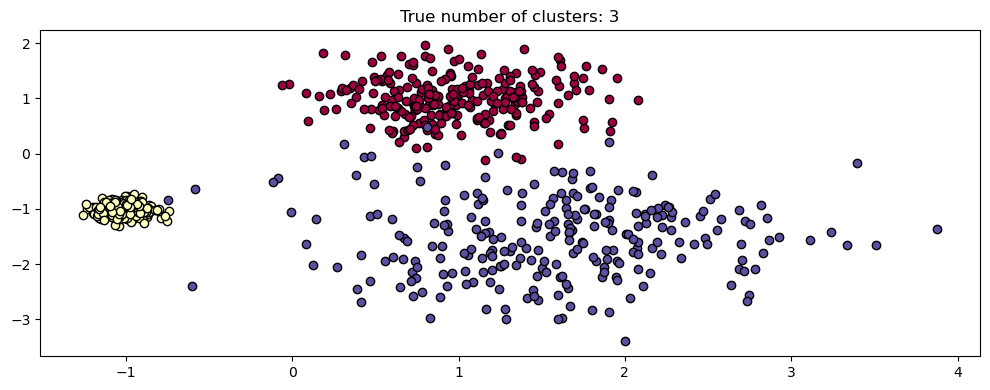

In [43]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

### Generate sample data
One of the greatest advantages of HDBSCAN over DBSCAN is its out-of-box robustness.

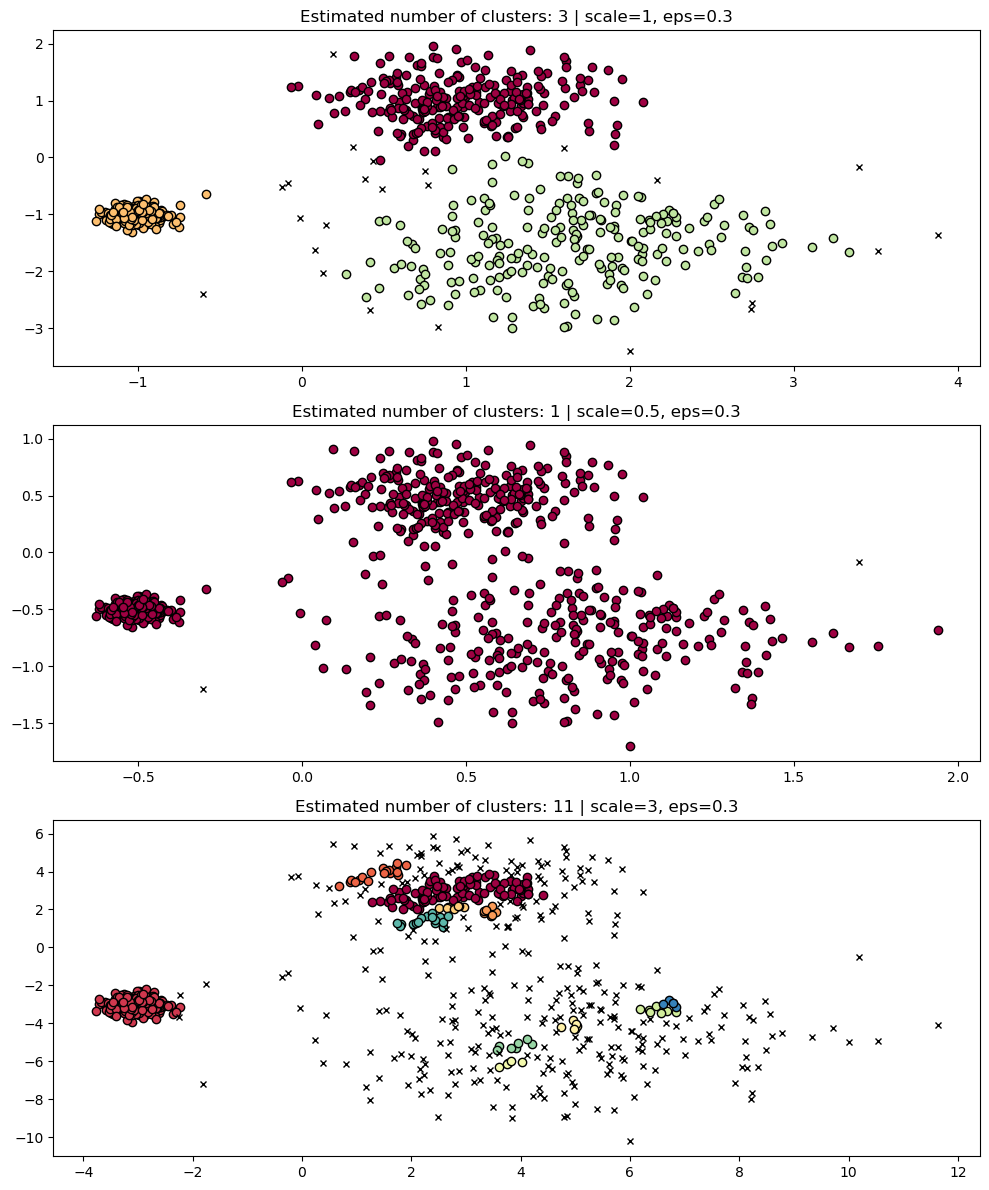

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

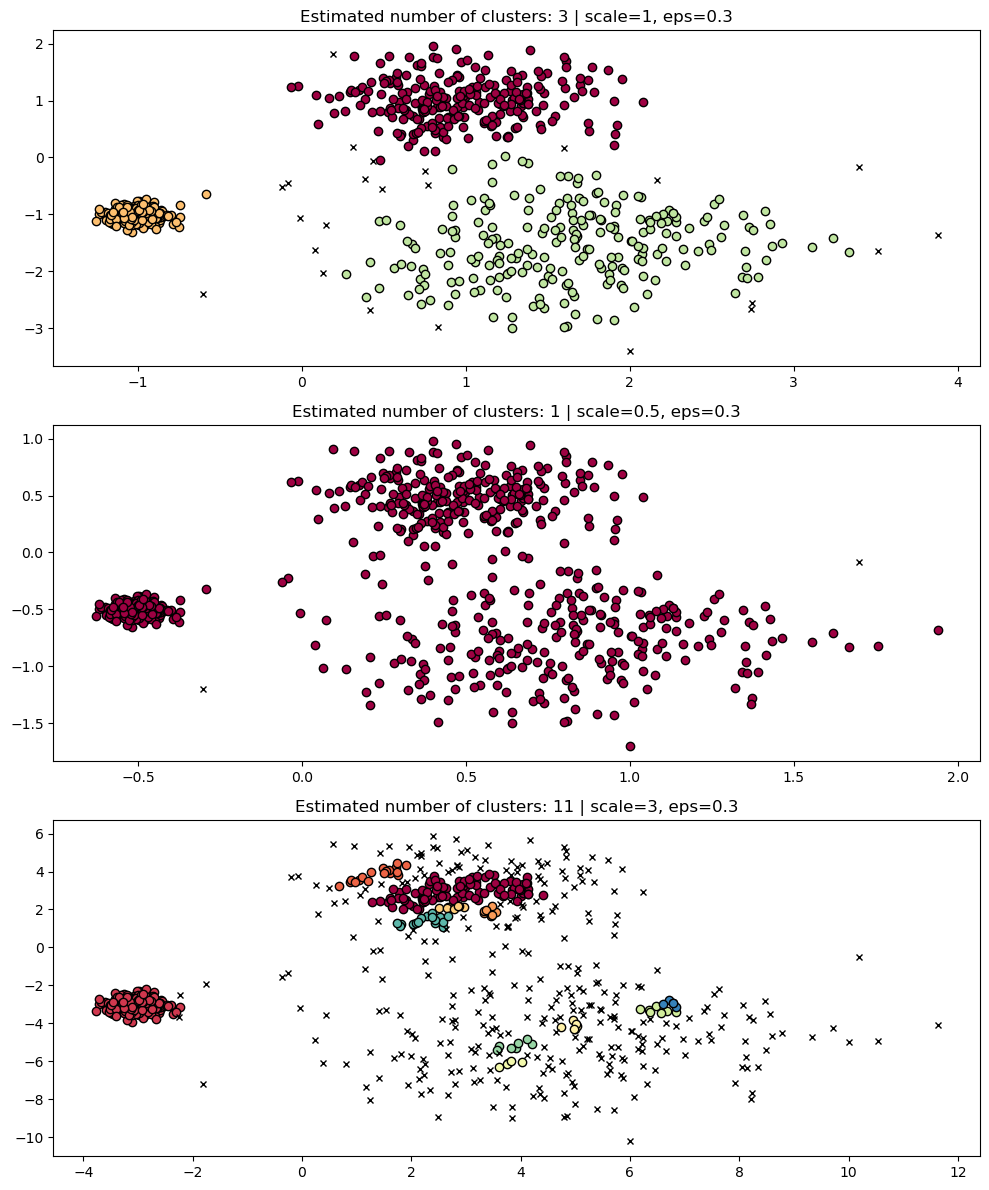

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

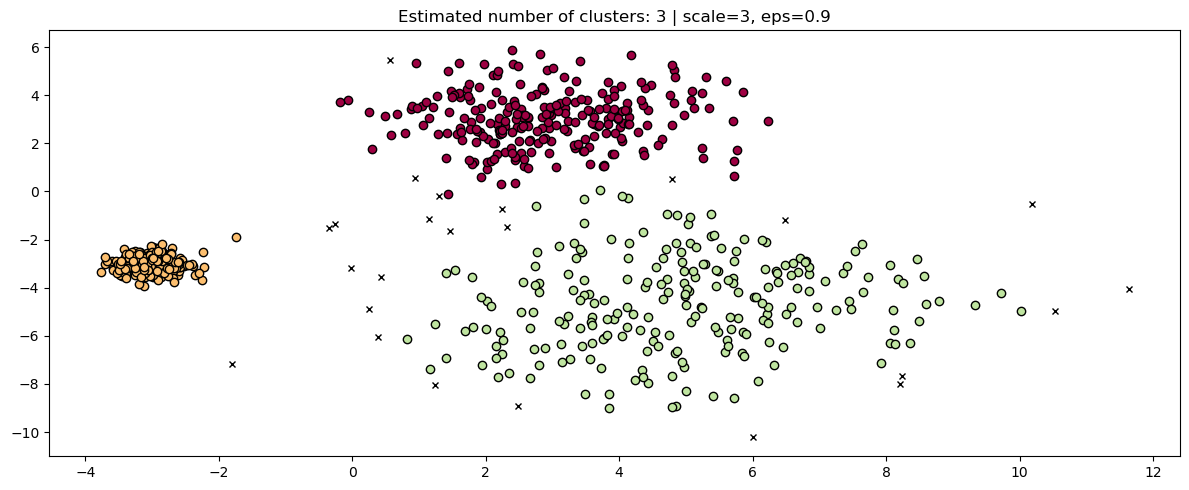

In [46]:
fig, axis = plt.subplots(1,1 ,figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3* X)
plot(3*X, dbs.labels_, parameters={"scale":3, "eps":0.9}, ax=axis)

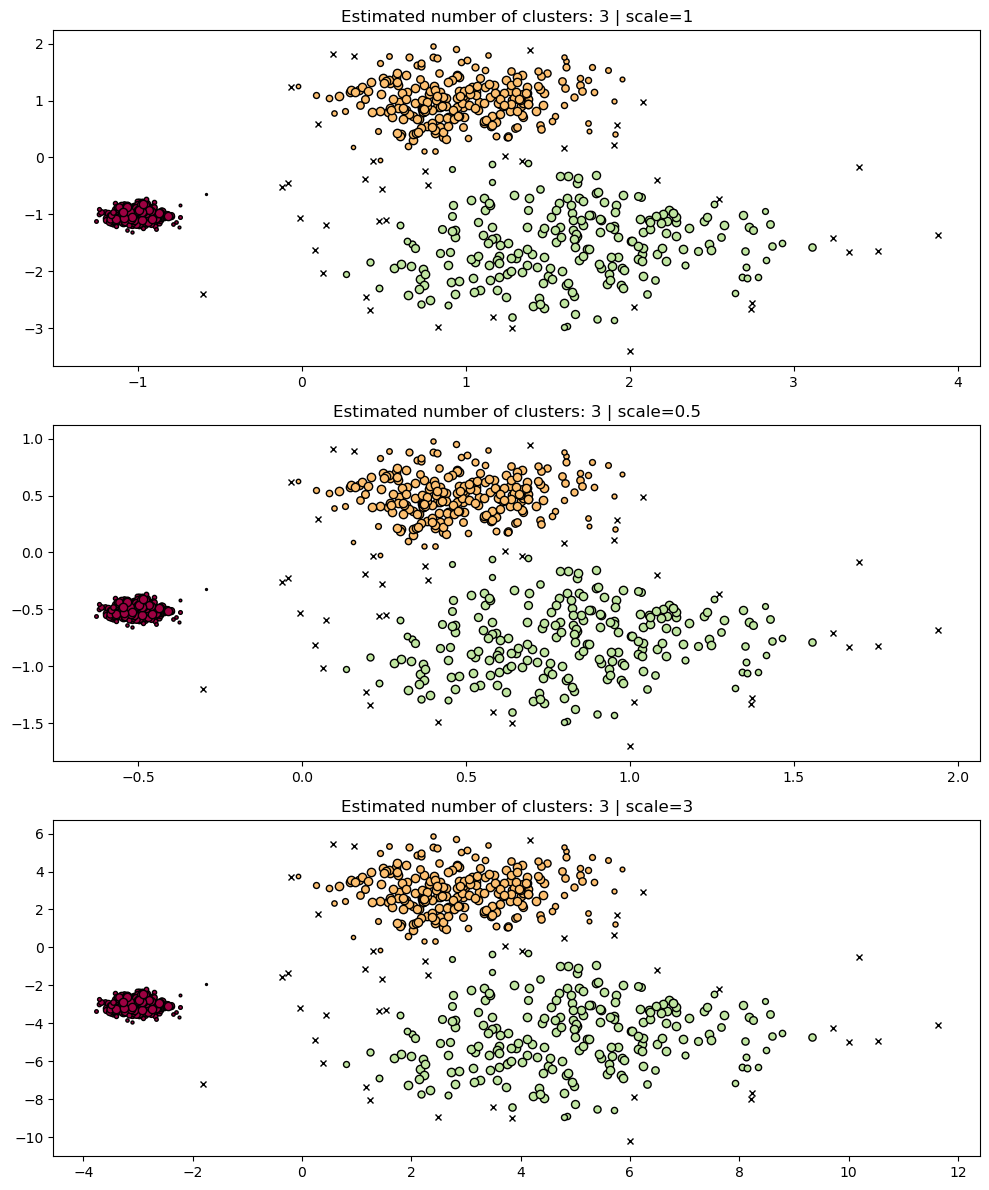

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(10,12))
hdb = HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(
        X * scale,
        hdb.labels_,
        hdb.probabilities_,
        ax=axes[idx],
        parameters={"scale": scale},
    )

### Multi-Scale Clustering
HDBSCAN is much more than scale invariant though - it is capable of multi-scale clustering, which accounts for clusters with varying density.

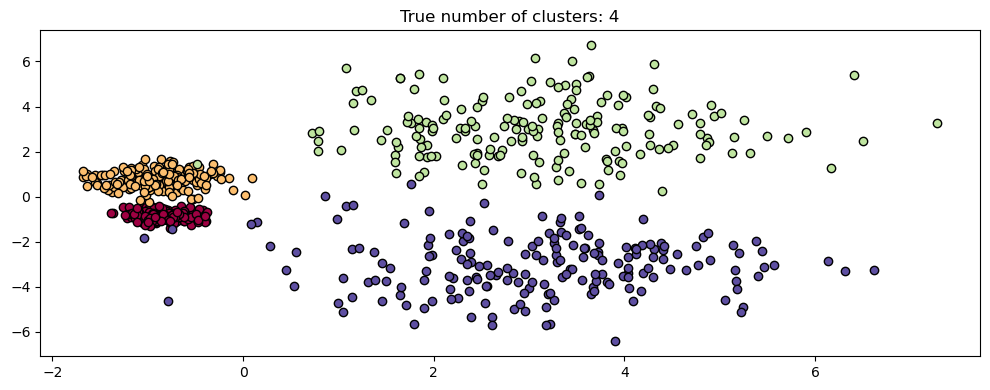

In [48]:
centers = [[-0.85,-0.85],[-0.85, 0.85],[3,3],[3,-3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

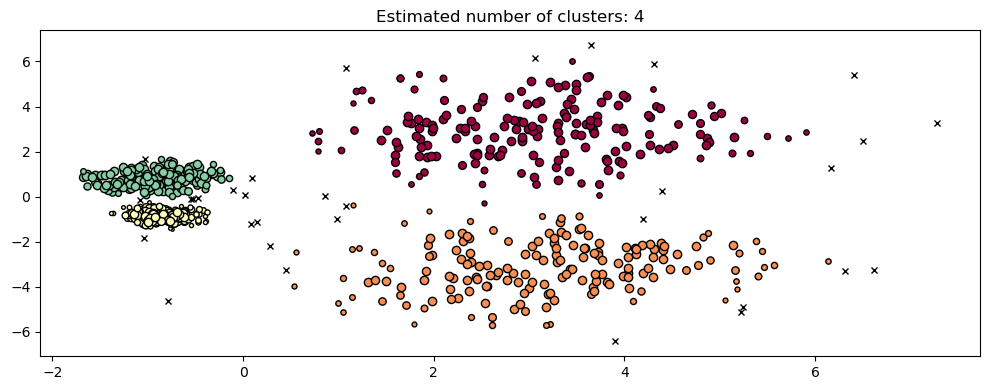

In [49]:
hdb = HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

### Hyperparameter Robustness
We will still see some hyperparameters like min_cluster_size , min_samples

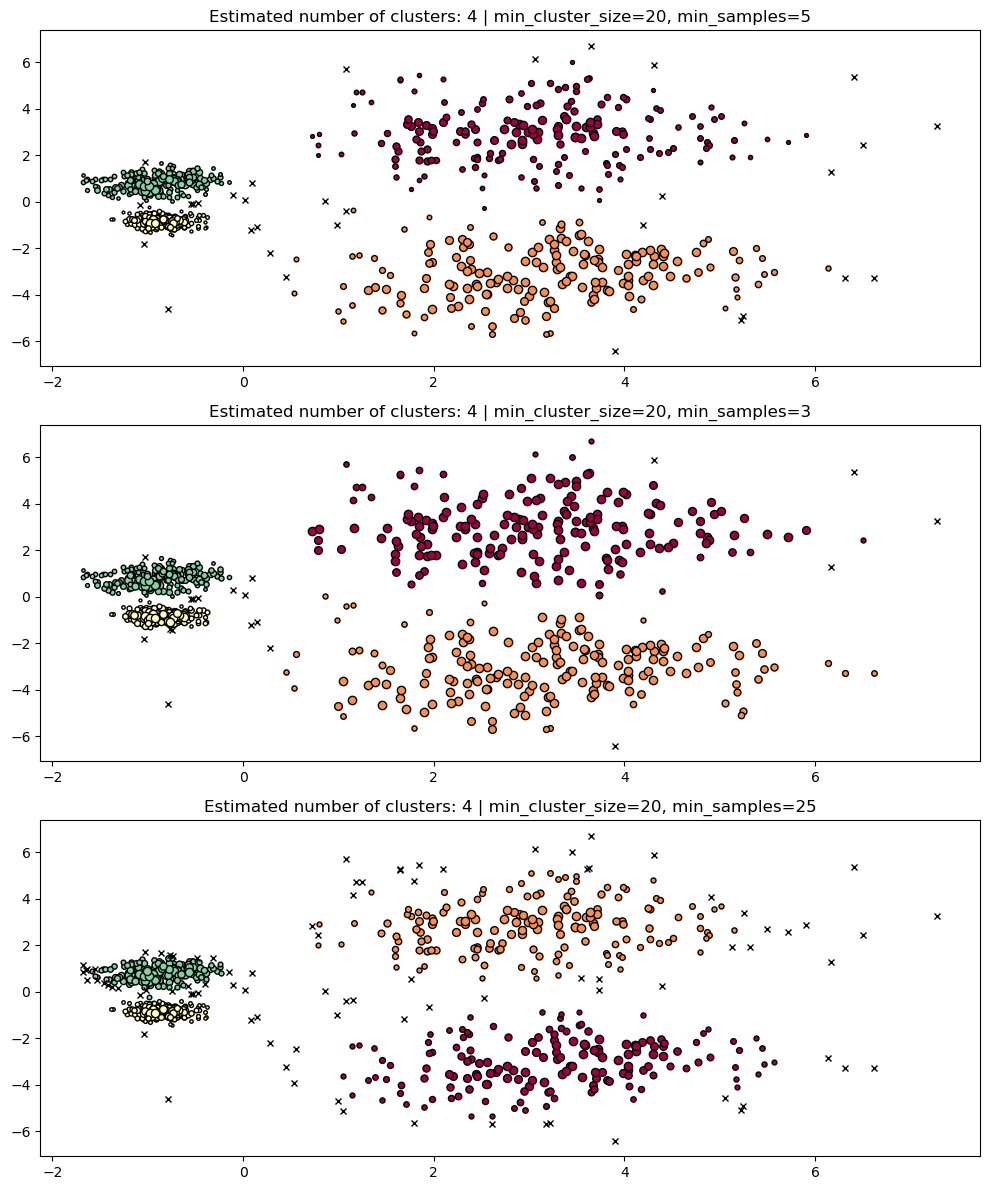

In [51]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = HDBSCAN(**param).fit(X)
    labels = hdb.labels_

    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

### min_cluster_size

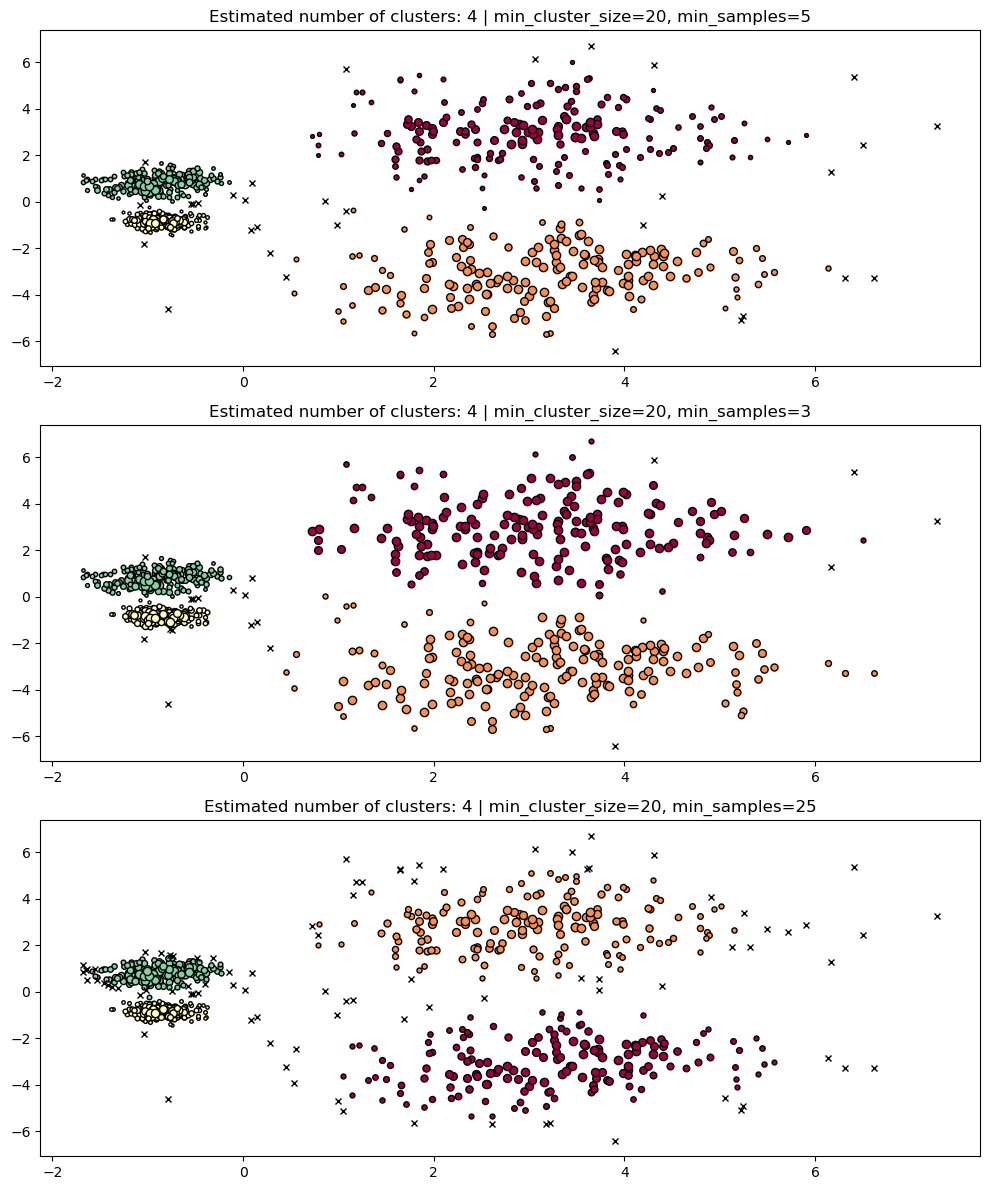

In [52]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = HDBSCAN(**param).fit(X)
    labels = hdb.labels_

    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

### min_samples

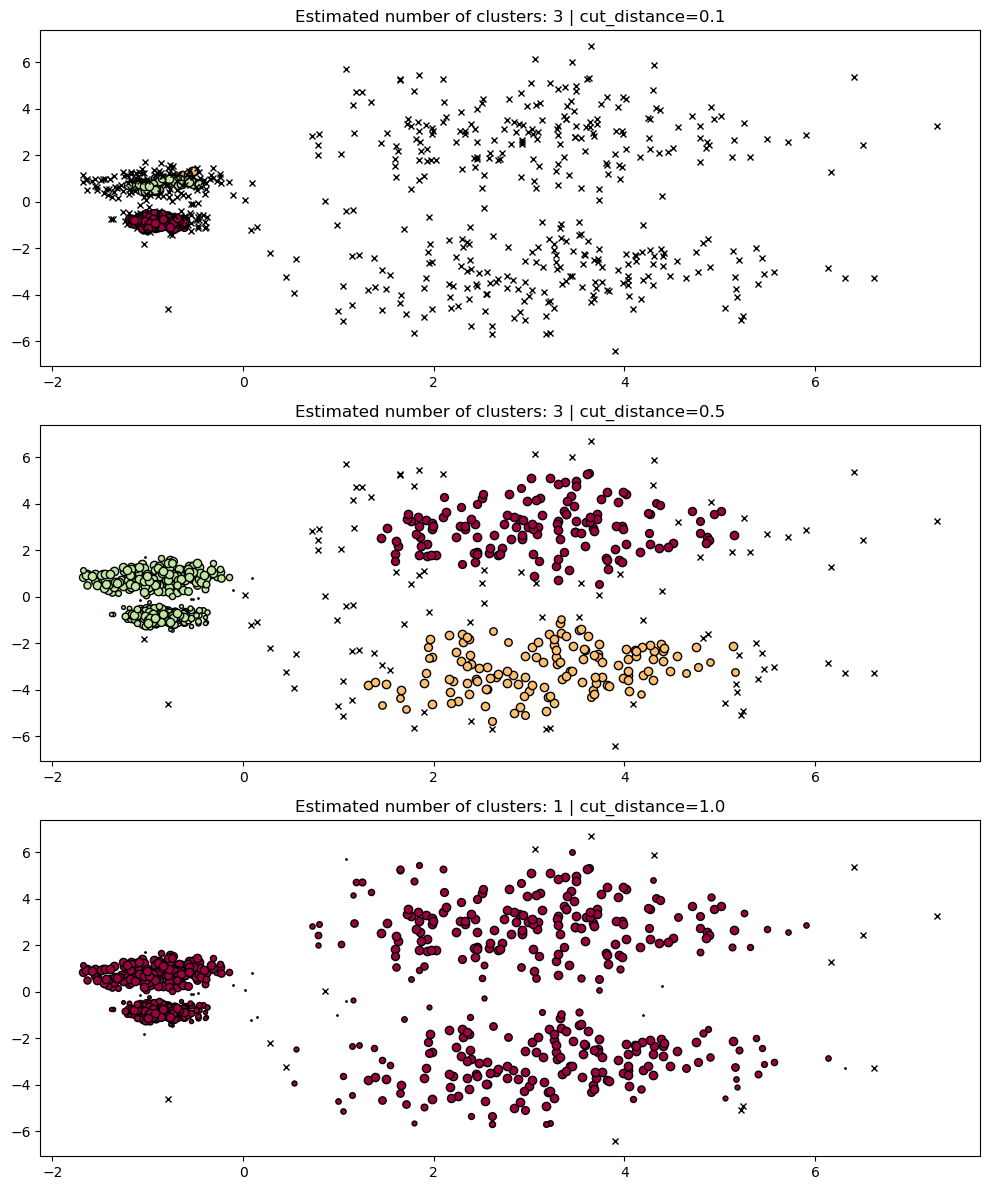

In [53]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = HDBSCAN()
hdb.fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)

    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

### dbscan_clustering